In [1]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
path = r'D:\NAYANA\Term 2\ML\Assignment\Assignment 1'
os.chdir(path)

test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Copying train to train1 so as to retain the original dataset

train1 = train
train1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train1.shape

(8523, 12)

In [5]:
# Calculating the percentage of null values in each columns.

round((train1.isnull().sum() / len(train1) * 100 ), 2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

* Only the 2 columns: Item_Weight and Outlet_Size have null values, 17.17% and 28.28% respectively. Which makes it a total of     45% null values in the entire dataset.
* But, dropping these two columns can give a false result, because the two columns might be perdictors with high
  significance.

REGRESSION

Regression analysis is a mathematical measure of the average relationship between two or more variables in terms of the original
units of the data.

LINES OF REGRESSION

If the variables in a bivariate distribution are related. we will find that the points in the scatter diagram will cluster 
round some curve called the 'curve of regression'. If the curve is a straight line. it is called the line of regression and
there is said to be 'linear regression' between the variables. Otherwise regression is said to be 'curvilinear'.

The line of regression is the line which gives the best estimate to the value of one variable for any specific value of the 
other variable. Thus the line of regression is the line of 'best fit' and is obtained by the principles of least squares.

5 KEY ASSUMPTIONS OF LINEAR REGRESSION

* Linear relationship
* Multivariate normality
* No or little multicollinearity
* No auto-correlation
* Homoscedasticity

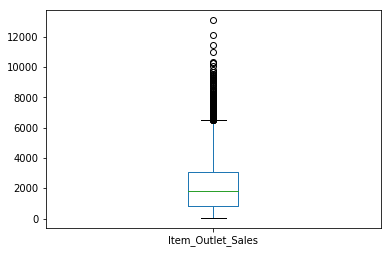

In [6]:
# To check if there are any outliers
# Whisker Plot

train1.Item_Outlet_Sales.plot(kind="box")
plt.show()

We can observe that there are a lot of outliers in the given data.

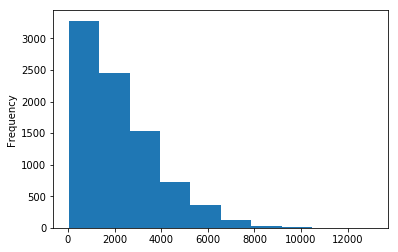

In [7]:
# To check if the data is normally distributed
# Histogram plotting

train1.Item_Outlet_Sales.plot(kind="hist")
plt.show()

In [8]:
# To check the skewness of the dependent variable

train1.Item_Outlet_Sales.skew()

1.1775306028542798

* We can observe that the value of skewness, is greater than 1, i.e., it is positively skewed.
* Hence, we need to go for square root transformation.

NB: But before treating outliers we need to clean the data by means of missing value treatment.

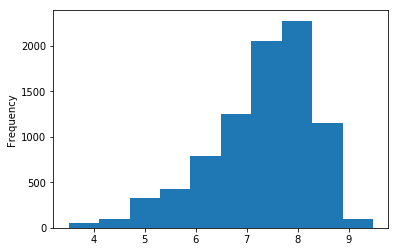

In [9]:
# Log transformation

np.log(train1.Item_Outlet_Sales).plot(kind="hist")
plt.show()

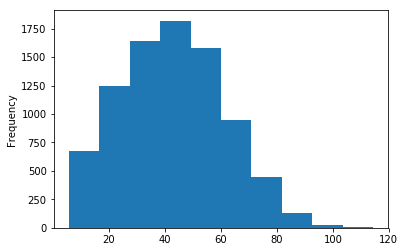

In [10]:
# Square root transformation

np.sqrt(train1.Item_Outlet_Sales).plot(kind="hist")
plt.show()

We can observe that, the data that became slightly negatively skewed after the log transformation, became normal after the
square root transformation.

In [11]:
# Dropping the column, Item_Identifier (not part of predicting the sales)

train1.drop("Item_Identifier", axis=1, inplace=True)

In [12]:
# Dropping Outlet_Identifier (not part of predicting the sales)

train1.drop("Outlet_Identifier", axis=1, inplace=True)

In [13]:
# Imputing the missing value use kNN

from missingpy import KNNImputer

# Creating the KNN imputation object

imputer = KNNImputer(missing_values= "NaN", n_neighbors= 2, metric="masked_euclidean", weights="distance")

# Applying the imputation object on the column where we want to impute the value

train1["Item_Weight"] = imputer.fit_transform(train1[["Item_Weight"]])

C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


In [14]:
train1.Item_Weight.isnull().sum()

0

In [15]:
train1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

* Replace Low Fat, low fat, LF as Low Fat as all the 3 are same.
* Similarly, replace Regular and reg as Regular.

In [16]:
def fat_content(x):
    if x == 'Low Fat' or x == 'LF' or x == 'low fat':
        return 1
    elif x == 'Regular' or x == 'reg':
        return 2
    else:
        return 0

train1['Item_Fat_Content'] = train1['Item_Fat_Content'].apply(fat_content)

In [17]:
train1.Item_Type.isnull().sum()

0

In [18]:
train1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
def item_type(x):
    if x == 'Dairy':
        return 1
    elif x == 'Soft Drinks':
        return 2
    elif x == 'Meat':
        return 3
    elif x == 'Fruits and Vegetables':
        return 4
    elif x == 'Household':
        return 5
    elif x == 'Baking Goods':
        return 6
    elif x == 'Snack Foods':
        return 7
    elif x == 'Frozen Foods':
        return 8
    elif x == 'Breakfast':
        return 9
    elif x == 'Health and Hygiene':
        return 10
    elif x == 'Hard Drinks':
        return 11
    elif x == 'Canned':
        return 12
    elif x == 'Breads':
        return 13
    elif x == 'Starchy Foods':
        return 14
    elif x == 'Others':
        return 15
    elif x == 'Seafood':
        return 16
    else:
        return 0

train1['Item_Type'] = train1['Item_Type'].apply(item_type)

In [20]:
train1.Outlet_Size.isnull().sum()

2410

In [21]:
# Replace Null value with small

train1["Outlet_Size"] = train1["Outlet_Size"].replace({np.nan:"Small"})

In [22]:
train1['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [23]:
def outlet_size(x):
    if x == 'Small':
        return 1
    elif x == 'Medium':
        return 2
    elif x == 'High':
        return 3
    else:
        return 0

train1['Outlet_Size'] = train1['Outlet_Size'].apply(outlet_size)

In [24]:
train1.Outlet_Type.isnull().sum()

0

In [25]:
train1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [26]:
def outlet_type(x):
    if x == 'Supermarket Type1':
        return 1
    elif x == 'Supermarket Type2':
        return 2
    elif x == 'Supermarket Type3':
        return 3
    elif x == 'Grocery Store':
        return 4
    else:
        return 0

train1['Outlet_Type'] = train1['Outlet_Type'].apply(outlet_type)

In [27]:
train1.Outlet_Location_Type.isnull().sum()

0

In [28]:
train1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [29]:
def outlet_location(x):
    if x == 'Tier 1':
        return 1
    elif x == 'Tier 2':
        return 2
    elif x == 'Tier 3':
        return 3
    else:
        return 0

train1['Outlet_Location_Type'] = train1['Outlet_Location_Type'].apply(outlet_location)

NB: Converted categories of the columns, Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type to numerical values.

In [30]:
train1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
train1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,1,249.8092,1999,2,1,1,3735.1380
1,5.92,2,0.019278,2,48.2692,2009,2,3,2,443.4228
2,17.50,1,0.016760,3,141.6180,1999,2,1,1,2097.2700
3,19.20,2,0.000000,4,182.0950,1998,1,3,4,732.3800
4,8.93,1,0.000000,5,53.8614,1987,3,3,1,994.7052


The above is the Final Test dataset, that will be used to build the Linear Regression Model.

# Building the Linear Model

# Model 1: 
Predictors:
* Item_Visibility
* Item_MRP

In [32]:
# Merging the independent variables

x = train1.loc[:,['Item_Visibility', 'Item_MRP']]

# Taking the square root of, to normalise

y = np.sqrt(train1.loc[:,'Item_Outlet_Sales'])

In [33]:
# Splitting the data into training and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)  # train_size = 0.8
len(x_train), len(x_test), len(y_train), len(y_test)

(6818, 1705, 6818, 1705)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 2), (1705, 2), (6818,), (1705,))

In [35]:
# Creating the model

lm = LinearRegression()


# Fitting the model (fitting the object to our training set)

model = lm.fit(x_train, y_train)

print('a0=', lm.intercept_)
print('a1=', lm.coef_)

# Predicting y using test_value

y_pred = lm.predict(x_test)
print('Predicted values are:\n', y_pred)

a0= 23.375735643409932
a1= [-56.12599971   0.16567121]
Predicted values are:
 [44.76119127 33.53483034 43.86130737 ... 63.04726446 23.28016587
 63.07093851]


In [36]:
# Calculating RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE= ', rmse)

# Calculating R-square

r2 = r2_score(y_test, y_pred)
print('Regressor Score is: ', r2)

RMSE=  15.145801178136114
Regressor Score is:  0.33657261372115166


* When we take Item_Visibility and Item_MRP as the predictors, R-square = 33.66%.
i.e., 33% variance in sales can explained by Item_Visibility and Item_MRP.

* If we know, Item_Visibility and Item_MRP, we can gain 33% information to predict the sales accurately.

In [37]:
coef = pd.DataFrame(x_train.columns)
coef['Coefficient'] = pd.Series(lm.coef_.reshape(2,))
coef.rename(columns={0:'Predictors'})

,Predictors,Coefficient
0,Item_Visibility,-56.126000
1,Item_MRP,0.165671


* We can observe that, Coefficient of Item_Visibility is a negative value.
* Coefficient of Item_MRP is greater than Item_Visibility
i.e., higher the MRP, higher is the sales.

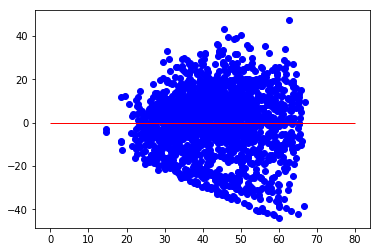

In [38]:
# Residual Plot: to check if the errors are randomly distributed

plt.scatter(y_pred, (y_test - y_pred), color = 'b')
plt.hlines(y = 0, xmin = 0, xmax = 80, color = 'r', linewidth=1)
plt.show()

* We can clearly observe that errors are almost constant in nature, that they are not random.
* The plot looks like little funnel shape due to variance of not constant errors
* According to the linear regression assumption we can say that a little heteroskedasticity present in the data is due to the outliers in the data
* But we have treated outliers using sqrt tranformation.

# Model 2:
Predictors:
* Item_Visibility
* Item_MRP
* Item_Weight

In [39]:
x = train1.loc[:,['Item_Weight', 'Item_Visibility', 'Item_MRP']]

y = np.sqrt(train1.loc[:, 'Item_Outlet_Sales'])

In [40]:
# Split the data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 3), (1705, 3), (6818,), (1705,))

In [42]:
# Creating the model

lm = LinearRegression()


# Fitting the model (fitting the object to our training set)

model = lm.fit(x_train, y_train)

print('a0=', lm.intercept_)
print('a1=', lm.coef_)

# Predicting y using test_value

y_pred = lm.predict(x_test)
print('Predicted values are:\n', y_pred)

a0= 23.73436479614493
a1= [-2.81946877e-02 -5.61484598e+01  1.65718532e-01]
Predicted values are:
 [44.71652711 33.53378252 43.90143458 ... 63.05588526 23.27520335
 63.07824745]


In [43]:
# Calculating RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE= ', rmse)

# Calculating R-square

r2 = r2_score(y_test, y_pred)
print('Regressor Score is: ', r2)

RMSE=  15.14643248519349
Regressor Score is:  0.3365173066278069


In [44]:
coef = pd.DataFrame(x_train.columns)
coef['Coefficient'] = pd.Series(lm.coef_.reshape(3,))
coef.rename(columns={0:'Predictors'})

,Predictors,Coefficient
0,Item_Weight,-0.028195
1,Item_Visibility,-56.148460
2,Item_MRP,0.165719


* Adding "Item_Weight" column is not improving the R-Square value and also the coefficient is close to Zero
* So it is better to drop this column from our model that retaining it.

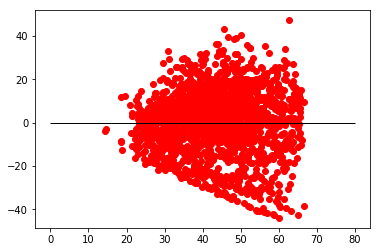

In [45]:
# Residual Plot to check errors are randomly distributed or not
plt.scatter(y_pred, (y_test - y_pred), color = 'r')
plt.hlines(y = 0, xmin = 0, xmax = 80, color = 'black', linewidth=1)
plt.show()

* There is no improvement in the residual plot as there is no change in the RMSE or R-Square value.
* But, we can observe that there is a slight decrease in the R-Square value.

# Model 3:
Predictors:
* Item_Visibility
* Item_MRP
* Outlet_Establishment_Year

In [46]:
x = train1.loc[:,['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

y = np.sqrt(train1.loc[:, 'Item_Outlet_Sales'])

In [47]:
# Split the data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [48]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 3), (1705, 3), (6818,), (1705,))

In [49]:
# Creating the model

lm = LinearRegression()


# Fitting the model (fitting the object to our training set)

model = lm.fit(x_train, y_train)

print('a0=', lm.intercept_)
print('a1=', lm.coef_)

# Predicting y using test_value

y_pred = lm.predict(x_test)
print('Predicted values are:\n', y_pred)

a0= 16.454166624894555
a1= [-5.60843589e+01  1.65669623e-01  3.46324787e-03]
Predicted values are:
 [44.77653659 33.48810266 43.89100928 ... 63.00964698 23.23983848
 63.02443385]


In [50]:
# Calculating RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE= ', rmse)

# Calculating R-square

r2 = r2_score(y_test, y_pred)
print('Regressor Score is: ', r2)

RMSE=  15.147338028003956
Regressor Score is:  0.3364379704615542


In [51]:
coef = pd.DataFrame(x_train.columns)
coef['Coefficient'] = pd.Series(lm.coef_.reshape(3,))
coef.rename(columns={0:'Predictors'})

,Predictors,Coefficient
0,Item_Visibility,-56.084359
1,Item_MRP,0.165670
2,Outlet_Establishment_Year,0.003463


* There is no much change in the R-Square value.
* With the above 3 features we can gain 33% of information to predict the sales accurately.

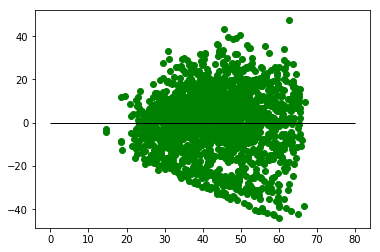

In [52]:
# Residual Plot to check errors are randomly distributed or not

plt.scatter(y_pred, (y_test - y_pred), color = 'g')
plt.hlines(y = 0, xmin = 0, xmax = 80, color = 'black', linewidth=1)
plt.show()

Same pattern is being observed in residual plot.

# Model 4:
Predictors:
* Item_Visibility
* Item_MRP
* Item_Fat_Content

In [53]:
x = train1.loc[:,['Item_Visibility', 'Item_MRP', 'Item_Fat_Content']]

y = np.sqrt(train1.loc[:, 'Item_Outlet_Sales'])

In [54]:
# Split the data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [55]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 3), (1705, 3), (6818,), (1705,))

In [56]:
# Creating the model

lm = LinearRegression()


# Fitting the model (fitting the object to our training set)

model = lm.fit(x_train, y_train)

print('a0=', lm.intercept_)
print('a1=', lm.coef_)

# Predicting y using test_value

y_pred = lm.predict(x_test)
print('Predicted values are:\n', y_pred)

a0= 22.6113157498538
a1= [-56.3882738    0.1656036    0.58405803]
Predicted values are:
 [44.54644597 33.34760294 43.66752468 ... 62.83087328 23.05339929
 63.45219812]


In [57]:
# Calculating RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE= ', rmse)

# Calculating R-square

r2 = r2_score(y_test, y_pred)
print('Regressor Score is: ', r2)

RMSE=  15.132397768349017
Regressor Score is:  0.33774630594215815


In [58]:
coef = pd.DataFrame(x_train.columns)
coef['Coefficient'] = pd.Series(lm.coef_.reshape(3,))
coef.rename(columns={0:'Predictors'})

,Predictors,Coefficient
0,Item_Visibility,-56.388274
1,Item_MRP,0.165604
2,Item_Fat_Content,0.584058


We can observe a slight increase in the R-Square value but it is not that significant.

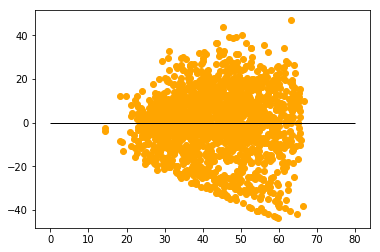

In [61]:
# Residual Plot to check errors are randomly distributed or not

plt.scatter(y_pred, (y_test - y_pred), color = 'orange')
plt.hlines(y = 0, xmin = 0, xmax = 80, color = 'black', linewidth=1)
plt.show()

There is no much variation in the Residual plot as compared to the previous one.

# Model 5:
Predictors:
* Item_Visibility
* Item_MRP
* Item_Fat_Content
* Outlet_Size

In [62]:
x = train1.loc[:,['Item_Visibility', 'Item_MRP', 'Item_Fat_Content', 'Outlet_Size']]

y = np.sqrt(train1.loc[:, 'Item_Outlet_Sales'])

In [63]:
# Split the data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 4), (1705, 4), (6818,), (1705,))

In [65]:
# Creating the model

lm = LinearRegression()


# Fitting the model (fitting the object to our training set)

model = lm.fit(x_train, y_train)

print('a0=', lm.intercept_)
print('a1=', lm.coef_)

# Predicting y using test_value

y_pred = lm.predict(x_test)
print('Predicted values are:\n', y_pred)

a0= 15.101945362163185
a1= [-50.39105369   0.16583693   0.52358151   4.64541332]
Predicted values are:
 [42.19875499 35.14082676 40.87974879 ... 69.67581154 21.11839163
 65.30145764]


In [66]:
# Calculating RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE= ', rmse)

# Calculating R-square

r2 = r2_score(y_test, y_pred)
print('Regressor Score is: ', r2)

RMSE=  14.712583162470949
Regressor Score is:  0.3739820966193863


In [67]:
coef = pd.DataFrame(x_train.columns)
coef['Coefficient'] = pd.Series(lm.coef_.reshape(4,))
coef.rename(columns={0:'Predictors'})

,Predictors,Coefficient
0,Item_Visibility,-50.391054
1,Item_MRP,0.165837
2,Item_Fat_Content,0.523582
3,Outlet_Size,4.645413


* We can observe that the R-Square value has increased from 33% to 37%.
* Thus, including "Outlet_Size" in the model, can improve the prediction of Sales.

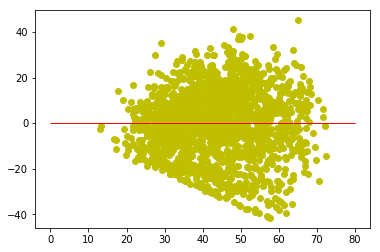

In [68]:
# Residual Plot to check errors are randomly distributed or not

plt.scatter(y_pred, (y_test - y_pred), color = 'y')
plt.hlines(y = 0, xmin = 0, xmax = 80, color = 'r', linewidth=1)
plt.show()

# Model 6:
Predictors:
* Item_Visibility
* Item_MRP
* Item_Fat_Content
* Outlet_Size
* Outlet_Location_Type

In [69]:
x = train1.loc[:,['Item_Visibility', 'Item_MRP', 'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']]

y = np.sqrt(train1.loc[:, 'Item_Outlet_Sales'])

In [70]:
# Split the data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [71]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 5), (1705, 5), (6818,), (1705,))

In [72]:
# Creating the model

lm = LinearRegression()


# Fitting the model (fitting the object to our training set)

model = lm.fit(x_train, y_train)

print('a0=', lm.intercept_)
print('a1=', lm.coef_)

# Predicting y using test_value

y_pred = lm.predict(x_test)
print('Predicted values are:\n', y_pred)

a0= 15.347782407741654
a1= [-50.3554681    0.1658306    0.51898452   4.76092248  -0.19935535]
Predicted values are:
 [42.15898414 35.01494953 40.83759739 ... 69.66632239 21.28123504
 65.17026644]


In [73]:
# Calculating RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE= ', rmse)

# Calculating R-square

r2 = r2_score(y_test, y_pred)
print('Regressor Score is: ', r2)

RMSE=  14.706780687487527
Regressor Score is:  0.374475787888197


In [74]:
coef = pd.DataFrame(x_train.columns)
coef['Coefficient'] = pd.Series(lm.coef_.reshape(5,))
coef.rename(columns={0:'Predictors'})

,Predictors,Coefficient
0,Item_Visibility,-50.355468
1,Item_MRP,0.165831
2,Item_Fat_Content,0.518985
3,Outlet_Size,4.760922
4,Outlet_Location_Type,-0.199355


* There is not much increase in the R-Square value.

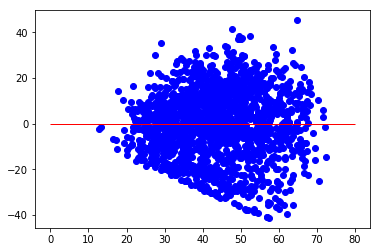

In [75]:
# Residual Plot to check errors are randomly distributed or not

plt.scatter(y_pred, (y_test - y_pred), color = 'b')
plt.hlines(y = 0, xmin = 0, xmax = 80, color = 'r', linewidth=1)
plt.show()

# Model 7:
Predictors:

* Item_Visibility
* Item_MRP
* Item_Fat_Content
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

In [76]:
x = train1.loc[:,['Item_Visibility', 'Item_MRP', 'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

y = np.sqrt(train1.loc[:, 'Item_Outlet_Sales'])

In [77]:
# Split the data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 6), (1705, 6), (6818,), (1705,))

In [79]:
# Creating the model

lm = LinearRegression()


# Fitting the model (fitting the object to our training set)

model = lm.fit(x_train, y_train)

print('a0=', lm.intercept_)
print('a1=', lm.coef_)

# Predicting y using test_value

y_pred = lm.predict(x_test)
print('Predicted values are:\n', y_pred)

a0= 20.43185310318759
a1= [-25.21551695   0.16542562   0.48344434   2.41207073   3.00084984
  -5.71545005]
Predicted values are:
 [47.74060131 28.03360354 44.61575948 ... 73.19570149  8.39141555
 58.38943285]


In [80]:
# Calculating RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE= ', rmse)

# Calculating R-square

r2 = r2_score(y_test, y_pred)
print('Regressor Score is: ', r2)

RMSE=  13.683765963704749
Regressor Score is:  0.45847293414789403


In [81]:
coef = pd.DataFrame(x_train.columns)
coef['Coefficient'] = pd.Series(lm.coef_.reshape(6,))
coef.rename(columns={0:'Predictors'})

,Predictors,Coefficient
0,Item_Visibility,-25.215517
1,Item_MRP,0.165426
2,Item_Fat_Content,0.483444
3,Outlet_Size,2.412071
4,Outlet_Location_Type,3.000850
5,Outlet_Type,-5.715450


* We can observe a very high increase in the R-Square value (from 37% to 45%).
* Thus, including, "Outlet_Type" in the model, can again improve the prediction of sales better.

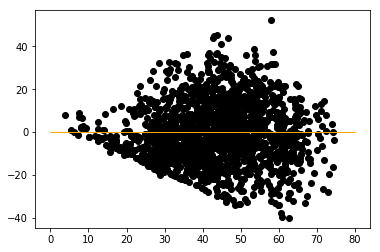

In [84]:
# Residual Plot to check errors are randomly distributed or not

plt.scatter(y_pred, (y_test - y_pred), color = 'black')
plt.hlines(y = 0, xmin = 0, xmax = 80, color = 'orange', linewidth=1)
plt.show()

# Model 8:
Predictors:
* Item_Visibility
* Item_MRP
* Item_Fat_Content
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type
* Item_Type

In [85]:
x = train1.loc[:,['Item_Visibility', 'Item_MRP', 'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
                 'Item_Type']]

y = np.sqrt(train1.loc[:, 'Item_Outlet_Sales'])

In [86]:
# Split the data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [87]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 7), (1705, 7), (6818,), (1705,))

In [88]:
# Creating the model

lm = LinearRegression()


# Fitting the model (fitting the object to our training set)

model = lm.fit(x_train, y_train)

print('a0=', lm.intercept_)
print('a1=', lm.coef_)

# Predicting y using test_value

y_pred = lm.predict(x_test)
print('Predicted values are:\n', y_pred)

a0= 19.797396067053832
a1= [-25.16184293   0.16553792   0.51498283   2.41960925   2.99727911
  -5.71296823   0.08460942]
Predicted values are:
 [48.00940358 28.04252235 44.87732789 ... 73.82497229  8.24031163
 58.19721426]


In [89]:
# Calculating RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE= ', rmse)

# Calculating R-square

r2 = r2_score(y_test, y_pred)
print('Regressor Score is: ', r2)

RMSE=  13.689684825147934
Regressor Score is:  0.45800436184364224


In [90]:
coef = pd.DataFrame(x_train.columns)
coef['Coefficient'] = pd.Series(lm.coef_.reshape(7,))
coef.rename(columns={0:'Predictors'})

,Predictors,Coefficient
0,Item_Visibility,-25.161843
1,Item_MRP,0.165538
2,Item_Fat_Content,0.514983
3,Outlet_Size,2.419609
4,Outlet_Location_Type,2.997279
5,Outlet_Type,-5.712968
6,Item_Type,0.084609


* We can observe a slight dip in the R-Square value even though its not that significant.

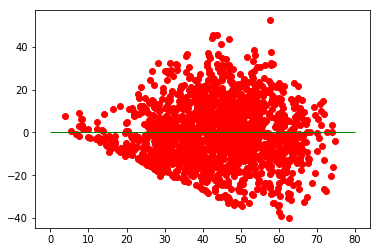

In [91]:
# Residual Plot to check errors are randomly distributed or not

plt.scatter(y_pred, (y_test - y_pred), color = 'r')
plt.hlines(y = 0, xmin = 0, xmax = 80, color = 'g', linewidth=1)
plt.show()

# Model 9:
Predictors:
* Item_Visibility
* Item_MRP
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

In [92]:
x = train1.loc[:,['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

y = np.sqrt(train1.loc[:, 'Item_Outlet_Sales'])

In [93]:
# Split the data into training set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [94]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 5), (1705, 5), (6818,), (1705,))

In [95]:
# Creating the model

lm = LinearRegression()


# Fitting the model (fitting the object to our training set)

model = lm.fit(x_train, y_train)

print('a0=', lm.intercept_)
print('a1=', lm.coef_)

# Predicting y using test_value

y_pred = lm.predict(x_test)
print('Predicted values are:\n', y_pred)

a0= 21.06610585421317
a1= [-24.99042394   0.16548152   2.41781136   2.99624943  -5.71616171]
Predicted values are:
 [47.91640666 28.18571159 44.77363774 ... 73.37957959  8.58022729
 58.07107102]


In [96]:
# Calculating RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE= ', rmse)

# Calculating R-square

r2 = r2_score(y_test, y_pred)
print('Regressor Score is: ', r2)

RMSE=  13.69227628797574
Regressor Score is:  0.4577991424380694


In [97]:
coef = pd.DataFrame(x_train.columns)
coef['Coefficient'] = pd.Series(lm.coef_.reshape(5,))
coef.rename(columns={0:'Predictors'})

,Predictors,Coefficient
0,Item_Visibility,-24.990424
1,Item_MRP,0.165482
2,Outlet_Size,2.417811
3,Outlet_Location_Type,2.996249
4,Outlet_Type,-5.716162


* R-Square value is 45%, that means 45% variance in Sales is explained by Item_Visibility, Item_MRP, Outlet_Size, Outlet_Location_Type, Outlet_Type

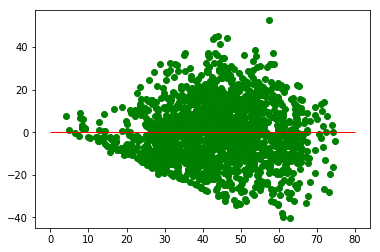

In [99]:
# Residual Plot to check errors are randomly distributed or not

plt.scatter(y_pred, (y_test - y_pred), color = 'green')
plt.hlines(y = 0, xmin = 0, xmax = 80, color = 'r', linewidth=1)
plt.show()

# Conclusion

From the above regression models we understand that the final model can be created using using "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Outlet_Size", "Outlet_Type" giving maximum result.

# Regularization Technique

# Ridge Regression

In [100]:
x = train1.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
                 'Outlet_Location_Type', 'Outlet_Type', 'Item_Fat_Content', 'Item_Type']]
y = train1.loc[:, 'Item_Outlet_Sales']

Alpha is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually.

In [101]:
from sklearn.linear_model import Ridge

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

# Creating a ridge regression object

alpha_list = [0.01, 0.05, 0.5, 5, 10]

for i in alpha_list:
    ridgeReg = Ridge(alpha = i, normalize = True)
    ridgeReg.fit(x_train, y_train)
    pred = ridgeReg.predict(x_test)
    print('R-square {} for alpha = {}' .format(r2_score(y_test, pred), i))


R-square 0.41983688027745936 for alpha = 0.01
R-square 0.4178367611570969 for alpha = 0.05
R-square 0.36380849865902465 for alpha = 0.5
R-square 0.1260992399804277 for alpha = 5
R-square 0.07196479171992964 for alpha = 10


* For the above model, R-Square = 42% (approx) is max at alpha = 0.01
* For the remaining alpha values R-Square value is decreasing.

In [102]:
# Fit the model for alpha = 0.01

ridge_reg = Ridge(alpha = 0.01, normalize=True)
ridge_reg.fit(x_train, y_train)
pred = ridge_reg.predict(x_test)
print('R-Square: ', r2_score(y_test, pred))

R-Square:  0.41983688027745936


In [103]:
ridge_reg.coef_

array([   -2.81929765, -2166.4573205 ,    15.38263975,   -39.987212  ,
        -112.8755391 ,   394.15580983,  -520.04266146,    52.04575295,
           5.54828708])

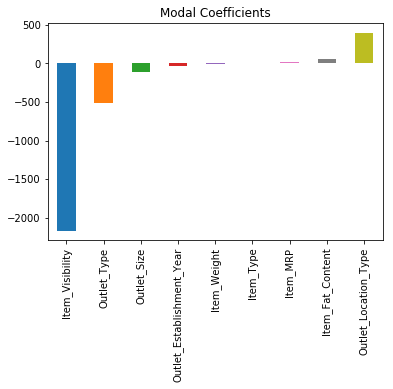

In [104]:
predictors = x_train.columns
coef = pd.Series(ridge_reg.coef_, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Modal Coefficients')

#plt.hlines(y = 0, xmin = -10, xmax = 100)


* We can clearly observe that the R-Square value is maximum when alpha = 0.01.
* In Ridge Regression, if we increase the alpha, coefficient will reach to zero but not absolute zero.
* It will not drop the column but will put lesser weightage to the coefficient which variable is not giving that much information about the independant variable, it will select the column according to its dependancy on sales.

# Lasso Regression

In [105]:
from sklearn.linear_model import Lasso

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Create a Lasso Regression object

alpha_list = [0.001, 0.01, 0.05, 0.5, 5, 10]

for i in alpha_list:
    lasso_reg = Lasso(alpha = i, normalize=True)
    lasso_reg.fit(x_train, y_train)
    pred2 = lasso_reg.predict(x_test)
    print('R-Square {} for alpha={}' .format(r2_score(y_test, pred2), i))

R-Square 0.41995207485396535 for alpha=0.001
R-Square 0.4199528548800313 for alpha=0.01
R-Square 0.4198355822712566 for alpha=0.05
R-Square 0.41310547514046136 for alpha=0.5
R-Square 0.25702911787745186 for alpha=5
R-Square 0.08675970968730762 for alpha=10


* We can observe that when alpha 0.01 the R-Square value is maximum.
* In Lasso regression, if alpha is increased, coefficient will reach to absolute zero
* It is a kind of feature extraction, it will select the column according to its dependancy on sales

In [106]:
# Fit the model for alpha = 0.001

lasso_reg = Lasso(alpha = 0.05, normalize=True)
lasso_reg.fit(x_train, y_train)
pred2 = lasso_reg.predict(x_test)
print('R-Square: ', r2_score(y_test, pred2))

R-Square:  0.4198355822712566


In [107]:
lasso_reg.coef_

array([-1.97204286e+00, -2.09235453e+03,  1.54687891e+01, -3.93725722e+01,
       -1.00478347e+02,  3.87942909e+02, -5.18202209e+02,  4.30162784e+01,
        4.50269932e+00])

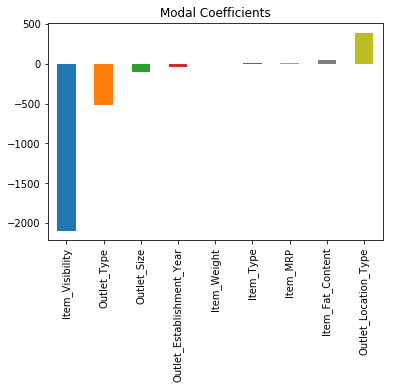

In [108]:
predictors = x_train.columns
coef = pd.Series(lasso_reg.coef_, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Modal Coefficients')

#plt.hlines(y = 0, xmin = -10, xmax = 100)

# TO PREDICT SALES USING THE TEST DATASET

Missing value treatment and all the cleaning process that was done for the training data needs to be done for the test data too as variance can alter the predictions of sales in test dataset.

In [109]:
test1 = test
test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [110]:
test1.shape

(5681, 11)

In [111]:
# Drop two columns that was dropped train test test

test1.drop(["Item_Identifier","Outlet_Identifier"], axis=1, inplace=True)

In [112]:
# checking for missing value

test1.isnull().sum() / len(test1)

Item_Weight                  0.171801
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282697
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64

In [113]:
# Imputing the missing value use kNN

from missingpy import KNNImputer

# Creating the KNN imputation object

imputer = KNNImputer(missing_values= "NaN", n_neighbors= 2, metric="masked_euclidean", weights="distance")

# Applying the imputation object on the column where we want to impute the value

test1["Item_Weight"] = imputer.fit_transform(test1[["Item_Weight"]])

C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\ProgramData\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


In [114]:
# Replace NaN with small

test1["Outlet_Size"] = test1["Outlet_Size"].replace({np.nan:"Small"})


In [115]:
test1.Outlet_Size.isnull().sum()

0

In [116]:
# Checking for missing value

test1.isnull().sum() / len(test1)

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

In [117]:
test1['Outlet_Size'] = test1['Outlet_Size'].apply(outlet_size)
test1['Outlet_Location_Type'] = test1['Outlet_Location_Type'].apply(outlet_location)
test1['Outlet_Type'] = test1['Outlet_Type'].apply(outlet_type)
test1['Item_Fat_Content'] = test1['Item_Fat_Content'].apply(fat_content)
test1['Item_Type'] = test1['Item_Type'].apply(item_type)
test1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,7,107.8622,1999,2,1,1
1,8.300000,2,0.038428,1,87.3198,2007,1,2,1
2,14.600000,1,0.099575,15,241.7538,1998,1,3,4
3,7.315000,1,0.015388,7,155.0340,2007,1,2,1
4,12.695633,2,0.118599,1,234.2300,1985,2,3,3


In [118]:
# From the test dataset take the columns which gives maximum R-Square for training dataset

x_test = test1.loc[:,['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]

In the training dataset while testing, square root transform was performed for the sales.

Inorder to get back to the original sales value of the test dataset, squaring is to be done again during the prediction.

In [119]:
# Predicting Item_Outlet_Sales for test data
# Add a new column to the original test dataset

test1['Item_Outlet_Sales'] = (lm.predict(x_test))

In [120]:
test1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750000,1,0.007565,7,107.8622,1999,2,1,1,40.841969
1,8.300000,2,0.038428,1,87.3198,2007,1,2,1,37.249744
2,14.600000,1,0.099575,15,241.7538,1998,1,3,4,47.125385
3,7.315000,1,0.015388,7,155.0340,2007,1,2,1,49.030954
4,12.695633,2,0.118599,1,234.2300,1985,2,3,3,53.538881


* Above is the test data set where a new column, "Item_Outlet_Sales" has been added according to the best linear regression model which has R-Square = 45.84% = 46% and least RMSE = 13.68.
* The features used in this model, will provide 46% information in predicting the sales accurately.